In [1]:
# 1.IMPORTACIÓN DE LIBRERIAS

!pip install -q kagglehub

import kagglehub
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 2.CARGA DEL ARCHIVO  CSV 

# Define la ruta del archivo limpio
clean_data_path = "../data/processed/energy_data_processed.csv"

# Carga el archivo en un nuevo DataFrame
df_clean = pd.read_csv(clean_data_path)

# Muestra las primeras filas para verificar que se cargó correctamente
print("DataFrame limpio cargado.")
df_clean.head()

# Muestra todas las columnas y más filas (sin imprimir todo el DataFrame)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100) # Puedes ajustar este número
print(df_clean.head())

display(df_clean)

DataFrame limpio cargado.
   Square Footage  Number of Occupants  Appliances Used  Average Temperature  \
0            7063                   76               10                29.84   
1           44372                   66               45                16.72   
2           19255                   37               17                14.30   
3           13265                   14               41                32.82   
4           13375                   26               18                11.92   

   Energy Consumption  Building Type_Commercial  Building Type_Industrial  \
0             2713.95                     False                     False   
1             5744.99                      True                     False   
2             4101.24                     False                      True   
3             3009.14                     False                     False   
4             3279.17                      True                     False   

   Building Type_Residential  

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
0,7063,76,10,29.84,2713.95,False,False,True,True,False
1,44372,66,45,16.72,5744.99,True,False,False,True,False
2,19255,37,17,14.30,4101.24,False,True,False,False,True
3,13265,14,41,32.82,3009.14,False,False,True,True,False
4,13375,26,18,11.92,3279.17,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
995,14419,68,44,23.95,3661.21,False,False,True,False,True
996,12194,7,22,14.67,3546.34,False,True,False,False,True
997,39562,88,20,32.18,5147.21,True,False,False,True,False
998,8348,67,37,16.48,3244.98,False,False,True,False,True


In [3]:
print(df_clean.size)

10000


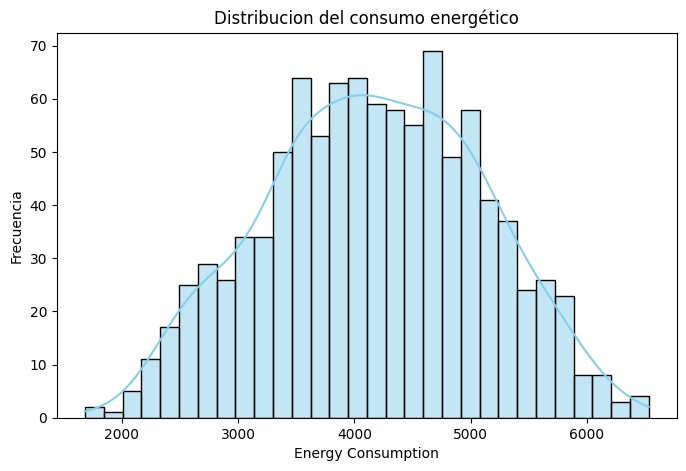

In [4]:
# 3. VISUALIZACION EXPLORATORIA

plt.figure(figsize=(8,5))
sns.histplot(df_clean['Energy Consumption'], kde=True,  bins=30, color='skyblue')
plt.title("Distribucion del consumo energético")
plt.xlabel("Energy Consumption")
plt.ylabel("Frecuencia")
plt.show()

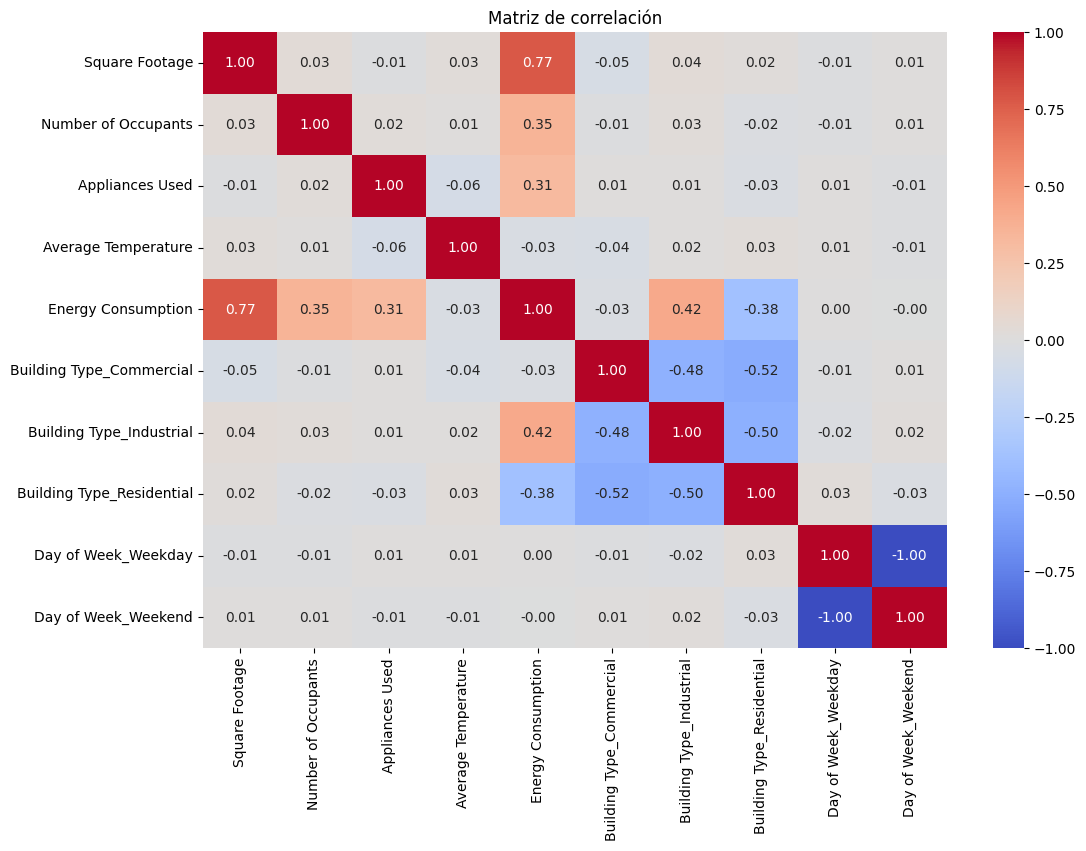

In [5]:
# Calcula y grafica la matriz  de correlación entre variables numéricas

plt.figure(figsize=(12,8))
corr_matrix =  df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',  fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


In [6]:
print(df_clean.columns.tolist())

['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption', 'Building Type_Commercial', 'Building Type_Industrial', 'Building Type_Residential', 'Day of Week_Weekday', 'Day of Week_Weekend']


In [7]:
# Limpia los nombres de columnas 
df_clean.columns = df_clean.columns.str.strip()
df_clean.columns = df_clean.columns.str.replace(' ', ' ')
# Si hay mas inconsistencias, puedes usar:

df_clean.columns = df_clean.columns.str.replace('\s+', ' ', regex=True)

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\alexi\AppData\Local\Temp\ipykernel_10412\1686610591.py:6: SyntaxWarning: invalid escape sequence '\s'
  df_clean.columns = df_clean.columns.str.replace('\s+', ' ', regex=True)


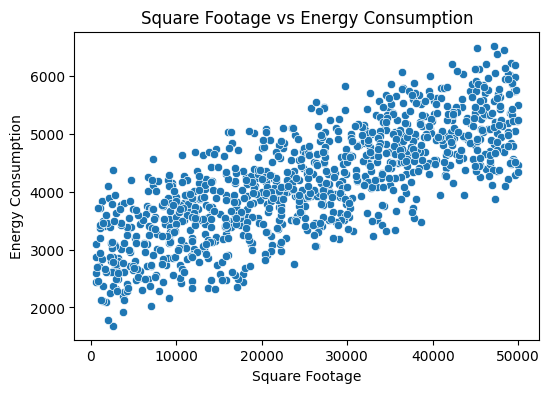

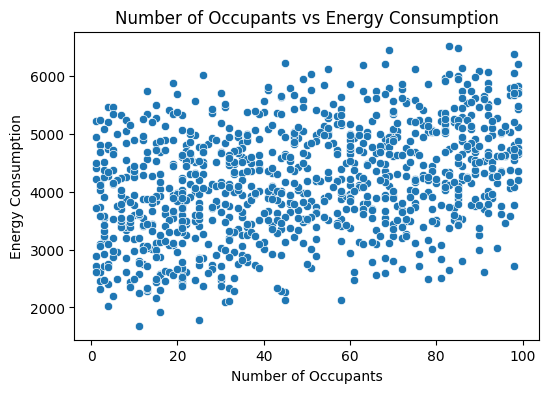

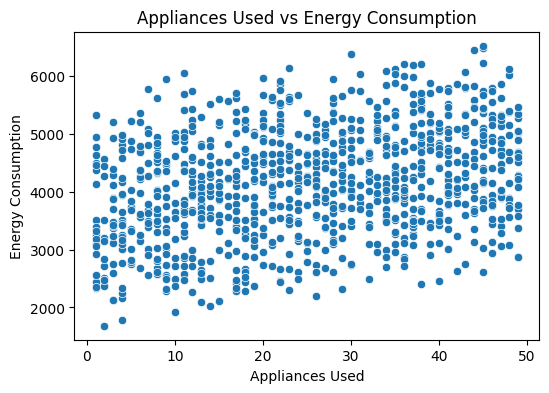

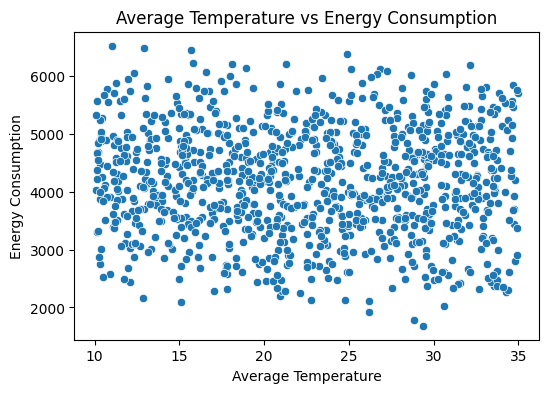

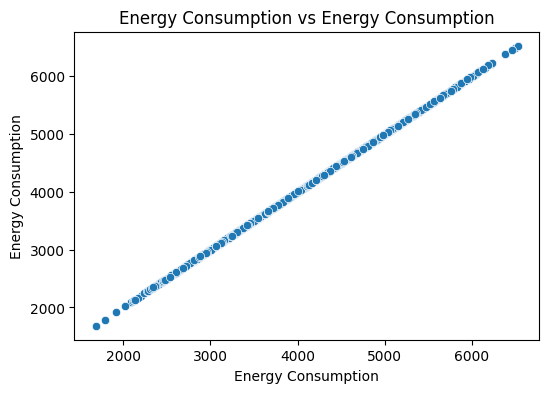

In [8]:
features_to_plot = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature', 'Energy Consumption']

for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_clean[feature], y=df_clean['Energy Consumption'])
    plt.title(f"{feature} vs Energy Consumption")
    plt.xlabel(feature)
    plt.ylabel("Energy Consumption")
    plt.show()

In [9]:
# 4. SEPERACIÓN DE VARIABLES OBJETIVO DE VARIABLES CARACTERISTICAS

target = 'Energy Consumption'
y = df_clean[target]
x = df_clean.drop(columns=[target])

In [10]:

# 5. DIVISION EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA

x_train, x_test, y_train, y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)

# Imprimimos las dimensiones de los nuevos conjuntos para verificarlos
print("Dimensiones de X de entrenamiento:", x_train.shape)
print("Dimensiones de X de prueba:", x_test.shape)
print("Dimensiones de y de entrenamiento:", y_train.shape)
print("Dimensiones de y de prueba:", y_test.shape)

Dimensiones de X de entrenamiento: (800, 9)
Dimensiones de X de prueba: (200, 9)
Dimensiones de y de entrenamiento: (800,)
Dimensiones de y de prueba: (200,)


In [11]:
# 6. NORMALIZACION DE LAS CARACTERISTICAS:

# Creamos una estancia de  StandardScaler
scaler = StandardScaler()

#  Ajusta y transforma los datos de entrenamiento
x_train_scaled = scaler.fit_transform(x_train)

# Transformar tambien los datos de prueba.
x_test_scaled =  scaler.transform(x_test)

In [12]:
# 7. CREAR Y ENTRENAR  EL MODELO

# Crear una instancia del modelo
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(x_train_scaled, y_train)

print("¡Modelo de Regresión Lineal entrenado con éxito!")

¡Modelo de Regresión Lineal entrenado con éxito!


In [13]:
## 8. EVALUACIÓN EN CONJUNTO DE PRUEBA 

# 1. Hacer predicciones sobre el conjunto de prueba
y_test_pred = model.predict(x_test_scaled)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\n Evaluación en conjunto de prueba:")
print(f"R²: {r2_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")


 Evaluación en conjunto de prueba:
R²: 1.00
MSE: 0.00
RMSE: 0.01
MAE: 0.01


In [14]:
# 9. EVALUACION  EN CONJUNTO DE ENTRENAMIENTO

y_train_pred = model.predict(x_train_scaled)
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
print("\n Evaluación en conjunto de entrenamiento:")
print(f"R2: {r2_train:.2f}")
print(f"MSE:  {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")


 Evaluación en conjunto de entrenamiento:
R2: 1.00
MSE:  0.00
RMSE: 0.01
MAE: 0.01


In [15]:
# 10.VERIFICACION DE SOBREAJUSTE

print("\n Analisis de sobreajuste:")
print(f"Diferencia en R2: {abs(r2_train - r2_test):.2f}")
print(f"Diferencia en RMSE: {abs(rmse_train - rmse_test):.2f}")
print(f"Diferencia en MAE: {abs(mae_train - mae_test):.2f}")

if abs(r2_train - r2_test) < 0.05 and abs(rmse_train - rmse_test) < 0.05:
   print("No se detecta sobreajuste significativo")
else:
   print("El modelo podría ser sobreajustado") 


 Analisis de sobreajuste:
Diferencia en R2: 0.00
Diferencia en RMSE: 0.00
Diferencia en MAE: 0.00
No se detecta sobreajuste significativo


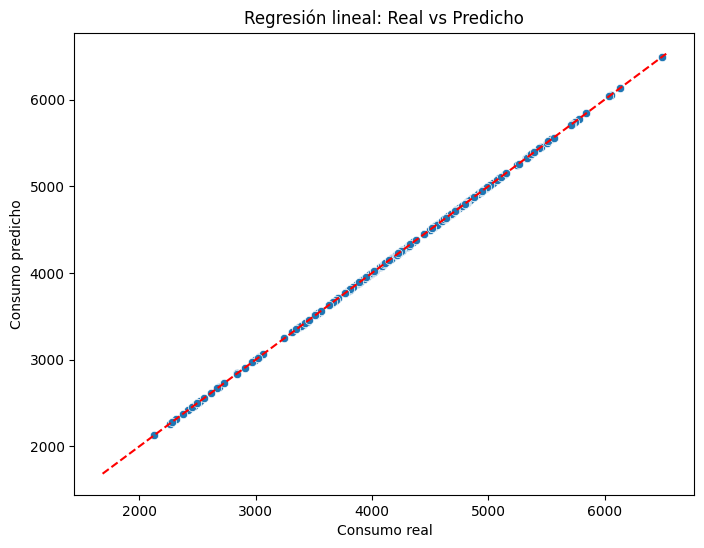

In [16]:
# 11. VISUALIZACION  DE PREDICCION VS REAL
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Consumo real")
plt.ylabel("Consumo predicho")
plt.title("Regresión lineal: Real vs Predicho")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()


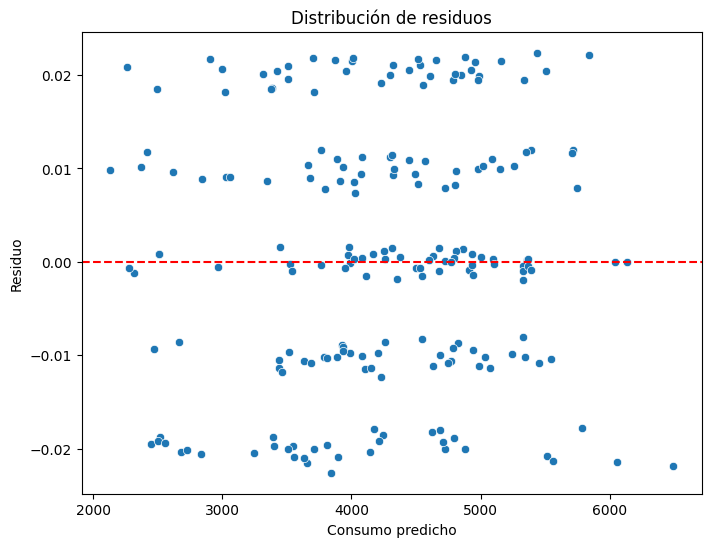

In [17]:
# Paso 12: Análisis de residuos
residuals = y_test - y_test_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Consumo predicho")
plt.ylabel("Residuo")
plt.title("Distribución de residuos")
plt.show()


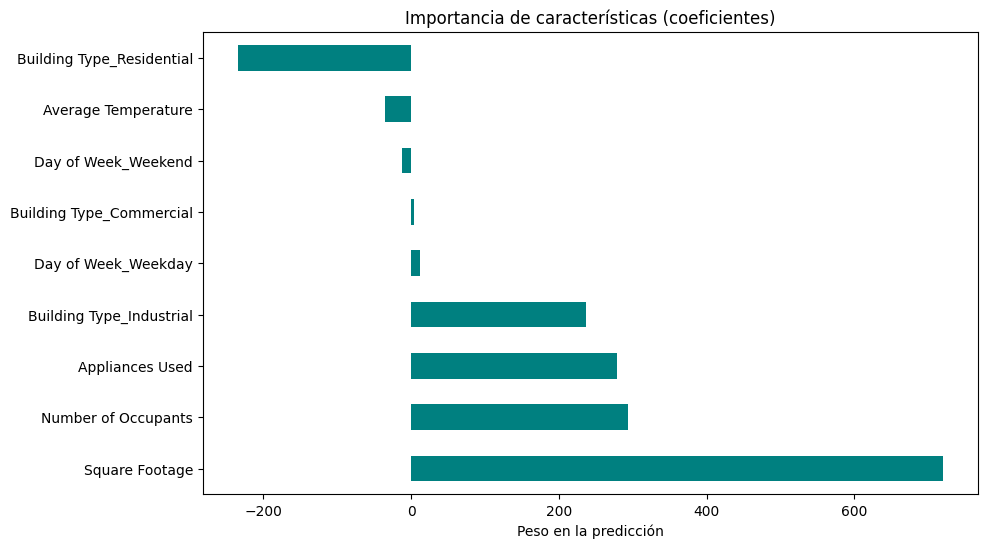

In [18]:
# Paso 13: Importancia de características
importances = pd.Series(model.coef_, index=x.columns)
plt.figure(figsize=(10,6))
importances.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title("Importancia de características (coeficientes)")
plt.xlabel("Peso en la predicción")
plt.show()
